In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("./dataset.csv")

<AxesSubplot:>

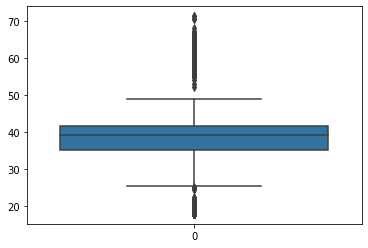

In [2]:
import seaborn as sns

# identifing outliers for latitude
sns.boxplot(df.loc[:, "latitude"])

In [3]:
# since box plots are not 100% accurate, we are going to 
# calculate the IQR to make sure to remove the actual outliers. 
# we are gonna repeat the same thing for the longitude. 
# steps: 
# 1. Calculate the first and third quartile (Q1 and Q3).
# 2. Further, evaluate the interquartile range, IQR = Q3-Q1.
# 3. Estimate the lower bound, the lower bound = Q1*1.5
# 4. Estimate the upper bound, upper bound = Q3*1.5
# 5. Replace the data points that lie outside of the lower and the upper bound with a NULL value.

for x in ['latitude']:
    q75, q25 = np.percentile(df.loc[:, x], [75, 25])  # step 1
    intr_qr = q75 - q25  # step 2

    max = q75 + (1.5 * intr_qr)  # step 3
    min = q25 - (1.5 * intr_qr)  # step 4

    df.loc[df[x] < min, x] = np.nan  # step 5
    df.loc[df[x] > max, x] = np.nan  # step 5

df.isnull().sum()

name               0
surname            0
sex                0
searching_sex      0
age                0
interests          0
latitude         513
longitude          0
dtype: int64

In [4]:
# removing all outliers from latitude column
df = df.dropna(axis=0)
df.isnull().sum()

name             0
surname          0
sex              0
searching_sex    0
age              0
interests        0
latitude         0
longitude        0
dtype: int64

<AxesSubplot:>

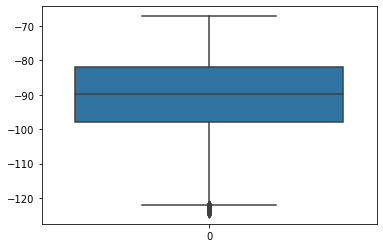

In [5]:
# identifing outliers for longitude
sns.boxplot(df.loc[:, "longitude"])

In [48]:
for x in ['longitude']:
    q75, q25 = np.percentile(df.loc[:, x], [75, 25])  # step 1
    intr_qr = q75 - q25  # step 2

    max = q75 + (1.5 * intr_qr)  # step 3
    min = q25 - (1.5 * intr_qr)  # step 4

    df.loc[df[x] < min, x] = np.nan  # step 5
    df.loc[df[x] > max, x] = np.nan  # step 5

df.isnull().sum()

name               0
surname            0
sex                0
searching_sex      0
age                0
interests          0
latitude           0
longitude        631
dtype: int64

In [49]:
# removing all outliers from longitude column
df = df.dropna(axis=0)
df.isnull().sum()

name             0
surname          0
sex              0
searching_sex    0
age              0
interests        0
latitude         0
longitude        0
dtype: int64

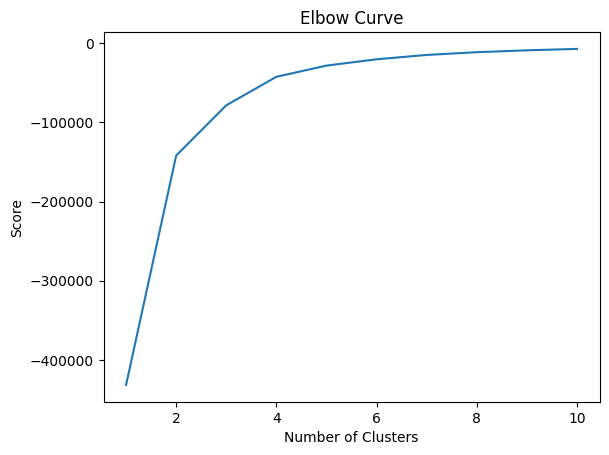

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# extracting latitude and longitude columns
X = df.loc[:, ['latitude', 'longitude']]

# running kmeans algorithm 10 times in order to use the 
# elbow point curve to get the right number of clutsers
# that the kmeans algorithm will generate
k_clusters = range(1, 11)
kmeans_instances = [KMeans(n_clusters=i, init="k-means++", random_state=0, n_init=10) for i in k_clusters]

Y_axis = df[['latitude']]
X_axis = df[['longitude']]

# for each run of the kmeans get the score, the value of the quadratic error sum, with i cluters
score = [kmeans_instances[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans_instances))]
# draw graph 
plt.plot(k_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

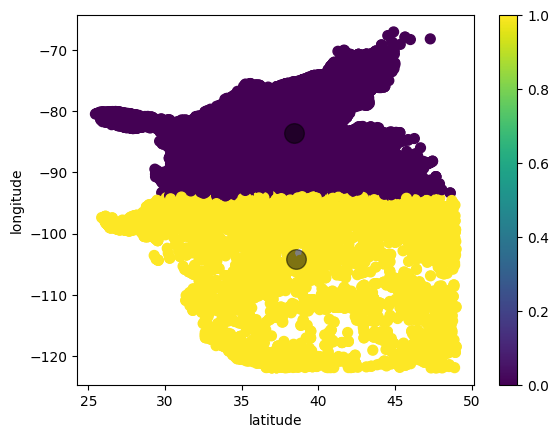

In [51]:
# the elbow point curve tells us that the right number of cluters
# is between 2 and 3. Let's try with both and foreach we calculate the
# silhouette value


# let's try first with 2 
kmeans_instances = KMeans(n_clusters=2, init="k-means++", random_state=0, n_init=10)
kmeans_instances.fit(X[X.columns[0:2]])  # Compute k-means 
X['cluster_label'] = kmeans_instances.fit_predict(X[X.columns[0:2]])
centers = kmeans_instances.cluster_centers_  # Coordinates of cluster 
labels = kmeans_instances.predict(X[X.columns[0:2]])  # Labels of each point

# draw results
X.plot.scatter(x='latitude', y='longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [52]:
# silhouette for k = 2
k2_silhouette = silhouette_score(X, X['cluster_label'])
k2_silhouette

0.47369924381265893

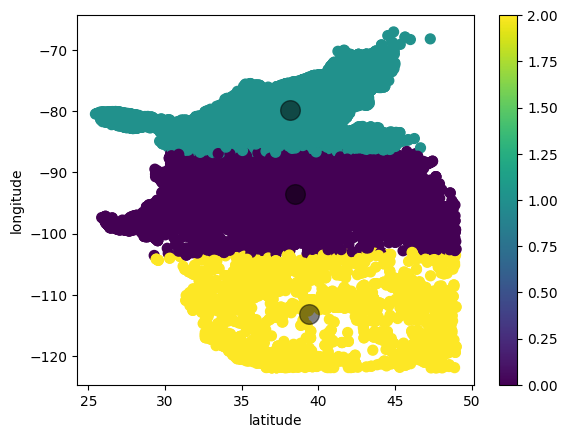

In [53]:
# let's try with 3

kmeans_instances = KMeans(n_clusters=3, init="k-means++", random_state=0, n_init=10)
kmeans_instances.fit(X[X.columns[0:2]])  # Compute k-means 
X['cluster_label'] = kmeans_instances.fit_predict(X[X.columns[0:2]])
centers = kmeans_instances.cluster_centers_  # Coordinates of cluster 
labels = kmeans_instances.predict(X[X.columns[0:2]])  # Labels of each point

# draw results
X.plot.scatter(x='latitude', y='longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [54]:
# silhouette for k = 3
k3_silhouette = silhouette_score(X, X['cluster_label'])
k3_silhouette

0.4595879953740622